### 1. Importando Bibliotecas

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib
import statsmodels.api as sm
import scipy
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import auc, precision_recall_curve, log_loss,confusion_matrix, recall_score, precision_score
from sklearn.compose import ColumnTransformer
from scipy.stats import loguniform
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

### 2. Importando Base:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
df_contratos = pd.read_csv('BASE_FINAL_5.csv', sep=',', decimal='.')
df_contratos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134235 entries, 0 to 134234
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   MESREF_NUM          134235 non-null  int64  
 1   VLR_ENTRADA         134235 non-null  float64
 2   VLR_FINANCIADO      134235 non-null  float64
 3   DOWN_PAYMENT        134235 non-null  float64
 4   RANGE_DOWN_PAYMENT  134235 non-null  object 
 5   QTD_PRAZO           134235 non-null  int64  
 6   QTD_PRAZO_AGRP      134235 non-null  object 
 7   MODELO_AGRP         134235 non-null  object 
 8   ESTADO_VEICULO      134235 non-null  object 
 9   ANO_FABRIC          134235 non-null  int64  
 10  FL_TCM              134235 non-null  int64  
 11  NS_RANGE_REGIAO     134235 non-null  object 
 12  NS_PONTUACAO_CRIVO  134025 non-null  float64
 13  NS_RATING_CRIVO     134235 non-null  object 
 14  GRUPO_LOJAS         134235 non-null  object 
 15  VLR_VEIC            134235 non-nul

In [18]:
df_contratos

,MESREF_NUM,VLR_ENTRADA,VLR_FINANCIADO,DOWN_PAYMENT,RANGE_DOWN_PAYMENT,QTD_PRAZO,QTD_PRAZO_AGRP,MODELO_AGRP,ESTADO_VEICULO,ANO_FABRIC,...,VLR_VEIC,SCORE_PONTOS,max_atraso,FX_MAX_ATRASO,MOB_FINAL_CONTRATO,STATUS_CONTRATO,CONTR_NEW,TIPO_PROD,DELTA_MOB,IDADE_VEIC
0,201804,28650.0,21980.19,0.57,51-60,24,13-24,Etios,N,2019,...,50630.19,995.0,0,0. 00 dpd,21,LIQUIDADO,5318042,CDC,-3,0
1,201804,50557.9,25186.80,0.67,61-80,36,25-36,Corolla,N,2019,...,75744.70,993.0,0,0. 00 dpd,27,LIQUIDADO,5318080,CDC,-9,0
2,201804,21000.0,54979.00,0.28,26-30,36,25-36,Etios,N,2019,...,75979.00,984.0,0,0. 00 dpd,35,LIQUIDADO,5319022,CICLO,-1,0
3,201804,30000.0,25579.99,0.54,51-60,24,13-24,Etios,N,2019,...,55579.99,995.0,2,1. 01-15 dpd,23,LIQUIDADO,5319628,CICLO,-1,0
4,201804,39938.5,46953.10,0.46,41-50,36,25-36,Corolla,N,2018,...,86891.60,976.0,0,0. 00 dpd,35,LIQUIDADO,5319914,CDC,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134230,202112,81380.0,100643.67,0.45,41-50,36,25-36,Corolla,N,2022,...,182023.67,990.0,1,1. 01-15 dpd,3,LIQUIDADO,7148891,CDC,-33,0
134231,202112,55000.0,44634.59,0.55,51-60,36,25-36,Outros,U,2020,...,99634.59,977.0,0,0. 00 dpd,0,LIQUIDADO,7148995,CDC,-36,1
134232,202112,68900.0,108472.47,0.39,31-40,60,49-60,Corolla Cross,N,2022,...,177372.47,952.0,29,2. 16-30 dpd,2,LIQUIDADO,7149058,CDC,-58,0
134233,202112,130000.0,72576.45,0.64,61-80,24,13-24,Corolla Cross,N,2022,...,202576.45,980.0,1,1. 01-15 dpd,3,LIQUIDADO,7149588,CDC,-21,0


### 3. Análise Exploratória e Limpeza dos Dados

Gerando coluna com percentual de antecipação

In [19]:
df_contratos['DELTA_MOB_PERC']= 100*df_contratos['DELTA_MOB']/df_contratos['QTD_PRAZO']

Eliminando clientes que atrasaram em mais que 25% do tempo a liquidação do contrato

In [20]:
df_contratos = df_contratos[df_contratos['DELTA_MOB_PERC']<25]

Histograma do mob percentual

(array([50805., 80806.]),
 array([-100.        ,  -38.33333333,   23.33333333]),
 <a list of 2 Patch objects>)

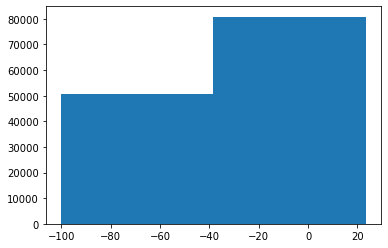

In [21]:
plt.hist(df_contratos['DELTA_MOB_PERC'],bins=2)

Clientes que pagaram com menos que 10% de antecipação

In [22]:
df_contratos[df_contratos['DELTA_MOB_PERC']>-10]

,MESREF_NUM,VLR_ENTRADA,VLR_FINANCIADO,DOWN_PAYMENT,RANGE_DOWN_PAYMENT,QTD_PRAZO,QTD_PRAZO_AGRP,MODELO_AGRP,ESTADO_VEICULO,ANO_FABRIC,...,SCORE_PONTOS,max_atraso,FX_MAX_ATRASO,MOB_FINAL_CONTRATO,STATUS_CONTRATO,CONTR_NEW,TIPO_PROD,DELTA_MOB,IDADE_VEIC,DELTA_MOB_PERC
2,201804,21000.0,54979.00,0.28,26-30,36,25-36,Etios,N,2019,...,984.0,0,0. 00 dpd,35,LIQUIDADO,5319022,CICLO,-1,0,-2.777778
3,201804,30000.0,25579.99,0.54,51-60,24,13-24,Etios,N,2019,...,995.0,2,1. 01-15 dpd,23,LIQUIDADO,5319628,CICLO,-1,0,-4.166667
4,201804,39938.5,46953.10,0.46,41-50,36,25-36,Corolla,N,2018,...,976.0,0,0. 00 dpd,35,LIQUIDADO,5319914,CDC,-1,0,-2.777778
5,201804,60000.0,30188.74,0.67,61-80,18,13-24,Corolla,N,2018,...,997.0,0,0. 00 dpd,17,LIQUIDADO,5320058,CDC,-1,0,-5.555556
7,201804,135650.0,107777.64,0.56,51-60,24,13-24,SW4,N,2018,...,997.0,11,1. 01-15 dpd,24,LIQUIDADO,5320363,CDC,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133907,202111,202189.0,102097.28,0.66,61-80,4,00-12,Hilux,N,2021,...,984.0,2,1. 01-15 dpd,4,LIQUIDADO,7103506,CDC,0,0,0.000000
133932,202111,299000.0,21321.32,0.93,>80,1,00-12,Hilux,N,2022,...,992.0,5,1. 01-15 dpd,1,LIQUIDADO,7105704,CDC,0,0,0.000000
133974,202112,220000.0,103491.41,0.68,61-80,3,00-12,Hilux,N,2022,...,795.0,15,1. 01-15 dpd,3,LIQUIDADO,7110263,CDC,0,0,0.000000
133975,202111,132000.0,10832.03,0.92,>80,1,00-12,Corolla,N,2022,...,880.0,1,1. 01-15 dpd,1,LIQUIDADO,7110273,CDC,0,0,0.000000


Dropando contratos com score nulo

In [23]:
df_contratos = df_contratos[df_contratos['SCORE_PONTOS'] != 0]

Dropando linhas com valores nulos

In [24]:
df_contratos.dropna( inplace=True)

Criando condições das categorias

In [25]:
CONDICOES = [
    (df_contratos['DELTA_MOB_PERC']<-10),
    (df_contratos['DELTA_MOB_PERC']>=-10)]

In [26]:
RESULTADO = ['ANTECIPOU MAIS QUE 10% DO TEMPO', 'ANTECIPOU MENOs QUE 10% DO TEMPO']

Gerando categorias

In [27]:
df_contratos['CATEGORIAS_ANTECIPACAO'] = np.select(CONDICOES, RESULTADO)

In [28]:
df_contratos

,MESREF_NUM,VLR_ENTRADA,VLR_FINANCIADO,DOWN_PAYMENT,RANGE_DOWN_PAYMENT,QTD_PRAZO,QTD_PRAZO_AGRP,MODELO_AGRP,ESTADO_VEICULO,ANO_FABRIC,...,max_atraso,FX_MAX_ATRASO,MOB_FINAL_CONTRATO,STATUS_CONTRATO,CONTR_NEW,TIPO_PROD,DELTA_MOB,IDADE_VEIC,DELTA_MOB_PERC,CATEGORIAS_ANTECIPACAO
0,201804,28650.0,21980.19,0.57,51-60,24,13-24,Etios,N,2019,...,0,0. 00 dpd,21,LIQUIDADO,5318042,CDC,-3,0,-12.500000,ANTECIPOU MAIS QUE 10% DO TEMPO
1,201804,50557.9,25186.80,0.67,61-80,36,25-36,Corolla,N,2019,...,0,0. 00 dpd,27,LIQUIDADO,5318080,CDC,-9,0,-25.000000,ANTECIPOU MAIS QUE 10% DO TEMPO
2,201804,21000.0,54979.00,0.28,26-30,36,25-36,Etios,N,2019,...,0,0. 00 dpd,35,LIQUIDADO,5319022,CICLO,-1,0,-2.777778,ANTECIPOU MENOs QUE 10% DO TEMPO
3,201804,30000.0,25579.99,0.54,51-60,24,13-24,Etios,N,2019,...,2,1. 01-15 dpd,23,LIQUIDADO,5319628,CICLO,-1,0,-4.166667,ANTECIPOU MENOs QUE 10% DO TEMPO
4,201804,39938.5,46953.10,0.46,41-50,36,25-36,Corolla,N,2018,...,0,0. 00 dpd,35,LIQUIDADO,5319914,CDC,-1,0,-2.777778,ANTECIPOU MENOs QUE 10% DO TEMPO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134230,202112,81380.0,100643.67,0.45,41-50,36,25-36,Corolla,N,2022,...,1,1. 01-15 dpd,3,LIQUIDADO,7148891,CDC,-33,0,-91.666667,ANTECIPOU MAIS QUE 10% DO TEMPO
134231,202112,55000.0,44634.59,0.55,51-60,36,25-36,Outros,U,2020,...,0,0. 00 dpd,0,LIQUIDADO,7148995,CDC,-36,1,-100.000000,ANTECIPOU MAIS QUE 10% DO TEMPO
134232,202112,68900.0,108472.47,0.39,31-40,60,49-60,Corolla Cross,N,2022,...,29,2. 16-30 dpd,2,LIQUIDADO,7149058,CDC,-58,0,-96.666667,ANTECIPOU MAIS QUE 10% DO TEMPO
134233,202112,130000.0,72576.45,0.64,61-80,24,13-24,Corolla Cross,N,2022,...,1,1. 01-15 dpd,3,LIQUIDADO,7149588,CDC,-21,0,-87.500000,ANTECIPOU MAIS QUE 10% DO TEMPO


### 4. Preparação do Dataset para Modelagem

Dividindo dataset em treino e teste

In [29]:
X, y = df_contratos.drop(['CATEGORIAS_ANTECIPACAO','RANGE_DOWN_PAYMENT','MESREF_NUM',	'NS_PONTUACAO_CRIVO',	'NS_RATING_CRIVO',	'SCORE_PONTOS'	,'VLR_ENTRADA','DELTA_MOB_PERC','VLR_FINANCIADO','QTD_PRAZO_AGRP','ANO_FABRIC','FX_MAX_ATRASO','CONTR_NEW','GRUPO_LOJAS','max_atraso','STATUS_CONTRATO','DELTA_MOB','FL_TCM','MOB_FINAL_CONTRATO','TIPO_PROD','VLR_VEIC'], axis=1), df_contratos['CATEGORIAS_ANTECIPACAO']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=123, stratify = y)

In [30]:
X

,DOWN_PAYMENT,QTD_PRAZO,MODELO_AGRP,ESTADO_VEICULO,NS_RANGE_REGIAO,IDADE_VEIC
0,0.57,24,Etios,N,Centro-Oeste,0
1,0.67,36,Corolla,N,Sudeste,0
2,0.28,36,Etios,N,Centro-Oeste,0
3,0.54,24,Etios,N,Nordeste,0
4,0.46,36,Corolla,N,Nordeste,0
...,...,...,...,...,...,...
134230,0.45,36,Corolla,N,Centro-Oeste,0
134231,0.55,36,Outros,U,Sul,1
134232,0.39,60,Corolla Cross,N,Nordeste,0
134233,0.64,24,Corolla Cross,N,Sudeste,0


###5.  Modelagem - Regressão Logística

Criando pipeline

In [31]:
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()
num_columns = X_train.select_dtypes(exclude=['object']).columns.tolist()

In [32]:
pipe_cat_columns = ('one_hot_encoder', 
                          OneHotEncoder(handle_unknown='ignore'),
                          cat_columns)

pipe_num_columns = ('min_max_scaler',
                          MinMaxScaler(), 
                          num_columns)

In [33]:
transformers = [pipe_cat_columns, pipe_num_columns]

In [34]:
pre_processador = ColumnTransformer(transformers)

In [35]:
model_reglog = Pipeline(steps=[('pre_processador', pre_processador), 
                               ('model', LogisticRegression())])

Obtendo melhores Hiperparâmetros por randomizedsearch

In [43]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=123)

In [44]:
space = dict()
space['model__solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['model__penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['model__C'] = loguniform(1e-5, 100)

In [45]:
search = RandomizedSearchCV(model_reglog, space, n_iter=200, scoring='accuracy', n_jobs=-1, cv=cv, random_state=123, verbose = 10)

Realizando fit

In [46]:
search.fit(X_train, y_train)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   29.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   32.1s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   39.1s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   48.6s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   59.1s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  1

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=1, n_splits=10, random_state=123),
                   estimator=Pipeline(steps=[('pre_processador',
                                              ColumnTransformer(transformers=[('one_hot_encoder',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               ['MODELO_AGRP',
                                                                                'ESTADO_VEICULO',
                                                                                'NS_RANGE_REGIAO']),
                                                                              ('min_max_scaler',
                                                                               MinMaxScaler(),
                                                                               ['DOWN_PAYMENT',
                                             

In [47]:
melhores_parametros = search.best_params_
melhor_resultado = search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'model__C': 0.1159909591318349, 'model__penalty': 'l1', 'model__solver': 'liblinear'}
0.6810189589195956


In [49]:
model_reglog = Pipeline(steps=[('pre_processador', pre_processador), 
                               ('model', LogisticRegression(C = 0.1159909591318349, penalty = 'l1', solver = 'liblinear'))])

In [50]:
model_reglog.fit(X_train, y_train)

Pipeline(steps=[('pre_processador',
                 ColumnTransformer(transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MODELO_AGRP',
                                                   'ESTADO_VEICULO',
                                                   'NS_RANGE_REGIAO']),
                                                 ('min_max_scaler',
                                                  MinMaxScaler(),
                                                  ['DOWN_PAYMENT', 'QTD_PRAZO',
                                                   'IDADE_VEIC'])])),
                ('model',
                 LogisticRegression(C=0.1159909591318349, penalty='l1',
                                    solver='liblinear'))])

Realizando predict

In [51]:
y_pred = model_reglog.predict(X_test)

In [52]:
def plot_confusion_matrix(y_test, y_pred):
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cbar=False, cmap=matplotlib.cm.get_cmap('gist_yarg'))
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.xticks([0.5, 1.5], ['Mais que 10', 'Antecipou menos que 10'])
    plt.yticks([0.5, 1.5], ['Mais que 10', 'Antecipou menos que 10'], rotation='horizontal')
    ax = plt.gca()
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')

Acurácia

In [57]:
# imprimindo a acurácia
print("Accuracy test:",metrics.accuracy_score(y_test, y_pred))

Accuracy test: 0.680457421136161


Matriz de confusão

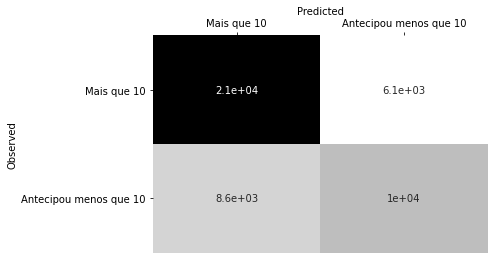

In [58]:
plot_confusion_matrix(y_test, y_pred)